In [10]:
### Perceptron is a simple linear binary classifier.
### Perceptron will never converge if the data is not linearly separable.

In [60]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# demo data
data = np.genfromtxt('perceptron_toydata.txt')

In [61]:
X = data[:,(0,1)]
y = data[:,2]

In [62]:
print('X.shape',X.shape)
print('y.shape',y.shape)

y = y.astype(int)
print(np.bincount(y))

X.shape (100, 2)
y.shape (100,)
[50 50]


In [63]:
# training indices
index = np.arange(X.shape[0])

# initializing a random state
rndm_state = np.random.RandomState(123)

# shuffling the indices 
rndm_state.shuffle(index)

# shuffled_indices
index

array([ 8, 70, 82, 28, 63,  0,  5, 50, 81,  4, 23, 65, 76, 60, 24, 42, 77,
       38, 56, 75, 35, 88, 19, 29, 31, 91, 85,  9, 53, 41, 21, 90, 33, 69,
       84, 87, 95, 97, 62, 12, 20, 89, 37, 59,  1, 74, 11, 79, 14, 54, 16,
       26, 51, 45,  6, 98, 30, 44, 72, 43, 15, 94, 18, 13, 22, 10, 58, 71,
       64,  3, 40, 34, 27, 52,  7, 48, 61, 93, 99, 39,  2, 67, 55, 49, 68,
       80, 36, 78, 96, 25, 46, 32, 73, 47, 86, 57, 83, 17, 92, 66])

In [64]:
# train test split
X_train, X_test = X[index[0:70]], X[index[70:]]
y_train, y_test = y[index[0:70]], y[index[70:]]

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 2), (30, 2), (70,), (30,))

In [66]:
# Normalize
mu_train, sigma_train = X_train.mean(axis=0), X_train.std(axis=0)
mu_test, sigma_test = X_test.mean(axis=0), X_test.std(axis=0)

X_train = X_train - mu_train / sigma_train
X_test = X_test - mu_test / sigma_test

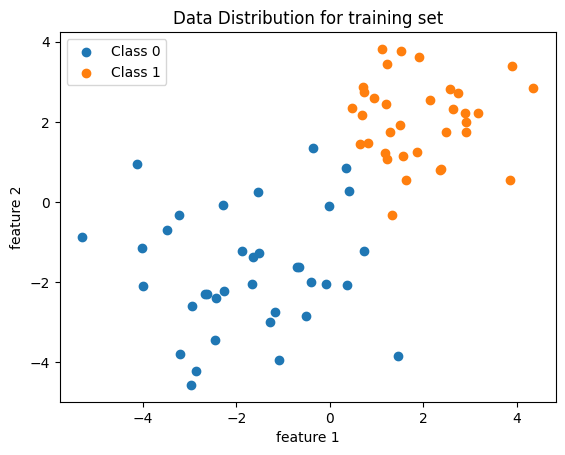

In [67]:
# plotting the data
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], label='Class 0')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], label='Class 1')
plt.legend()
plt.title('Data Distribution for training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

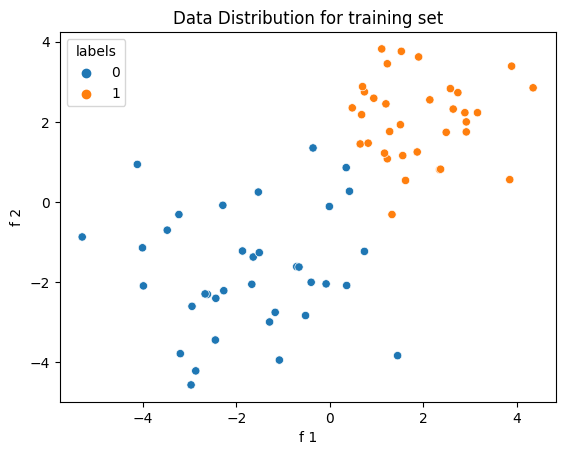

In [68]:
# another way of plotting the data
df = pd.DataFrame({'f 1':X_train[:,0],'f 2':X_train[:,1],'labels':y_train})
sns.scatterplot(data=df,x='f 1',y='f 2',hue='labels')
plt.title('Data Distribution for training set')
plt.show()

In [69]:
class Perceptron:
    
    def __init__(self, num_features):
        
        self.num_features = num_features

        # for a single layer perceptron, the no. of weights is equal to number of feature
        self.weights = np.zeros(num_features, dtype=float)
        self.bias = np.zeros(1,dtype=float)
    
    def forward(self, x):

        linear = np.dot(x,self.weights) + self.bias
        # Activation function
        # Step function which makes the output as binary
        predictions = np.where(linear>0, 1, 0)
        return predictions
    
    def backward(self, x, y):
        
        predictions = self.forward(x)

        # error = true clas labels - predictions
        error = y - predictions
        return error

    def train(self, x, y, epochs):
        
        # The perceptron adjusts the weights and the bias based on the errors in the predictions.  
        for e in range(epochs):
            for i in range(y.shape[0]):
                error = self.backward(x[i], y[i])
                self.weights += error * x[i]
                self.bias += error*1

    def evaluate(self, x, y):
        predictions = self.forward(x)
        accuracy = np.sum(predictions==y)/y.shape[0]
        return accuracy

In [70]:
ppn = Perceptron(num_features=2)
for e in range(1,6):
    
    ppn.train(X_train, y_train, epochs=e)
    accuracy = ppn.evaluate(X_test,y_test)
    print('No. of epochs: ',e,' Test Accuracy: ', accuracy)

No. of epochs:  1  Test Accuracy:  1.0
No. of epochs:  2  Test Accuracy:  1.0
No. of epochs:  3  Test Accuracy:  1.0
No. of epochs:  4  Test Accuracy:  1.0
No. of epochs:  5  Test Accuracy:  1.0


In [72]:
ppn = Perceptron(num_features=2)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device = device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)
for e in range(1,6):
    
    ppn.train(X_train_tensor, y_train_tensor, epochs=e)
    accuracy = ppn.evaluate(X_test_tensor,y_test_tensor)
    print('No. of epochs: ',e,' Test Accuracy: ', accuracy)

TypeError: Concatenation operation is not implemented for NumPy arrays, use np.concatenate() instead. Please do not rely on this error; it may not be given on all Python implementations.

In [172]:
# Weights and bias
ppn.weights, ppn.bias

(array([2.25238639, 1.06888975]), array([-2.]))

Text(0.5, 1.0, 'Decision bounary for test data')

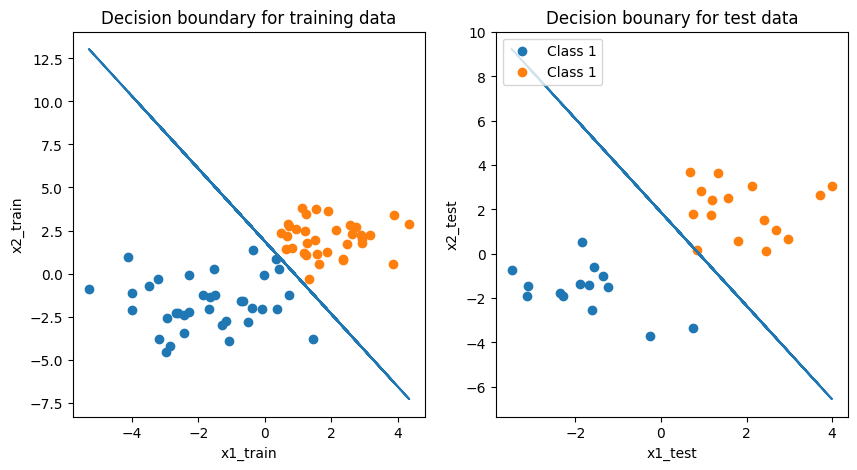

In [177]:
# Plotting the 2d Decision boundary
# Decision boundary equation
# x2 = ((-w1 * x1) - (b)) / (w2)

fig, ax = plt.subplots(1,2,figsize=(10,5))
w1, w2 = ppn.weights
b = ppn.bias

x1_train = X_train[:,0]
x2_train = - ((w1 * x1_train + b) / w2)

ax[0].plot(x1_train,x2_train)
ax[0].scatter(X_train[y_train==0,0],X_train[y_train==0,1], label='Class 0')
ax[0].scatter(X_train[y_train==1,0],X_train[y_train==1,1], label='Class 1')
ax[0].set_xlabel('x1_train')
ax[0].set_ylabel('x2_train')
ax[0].set_title('Decision boundary for training data')

x1_test = X_test[:,0]
x2_test = - ((w1 * x1_test + b) / w2)

ax[1].plot(x1_test,x2_test)
ax[1].scatter(X_test[y_test==0,0], X_test[y_test==0,1], label='Class 1')
ax[1].scatter(X_test[y_test==1,0],X_test[y_test==1,1], label='Class 1')
ax[1].set_xlabel('x1_test')
ax[1].set_ylabel('x2_test')
ax[1].legend(loc='upper left')
ax[1].set_title('Decision boundary for test data')

In [98]:
# if gpu is available, it will use GPU else CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class P:
    
    def __init__(self, num_features):
        
        self.num_features = num_features

        # for a single layer perceptron, the no. of weights is equal to number of feature
        # This creates a pytorch tensor
        self.weights = torch.zeros(num_features, dtype=torch.float32, device=device)
        self.bias = torch.zeros(1,dtype = torch.float32, device=device)
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(0)
    
    def forward(self, x):

        linear = torch.add(torch.matmul(x,self.weights), self.bias)
        print(linear)
        # Activation function
        # Step function which makes the output as binary
        predictions = torch.where(linear>0, self.ones, self.zeros)
        print(predictions)
        return predictions
    
    def backward(self, x, y):
        
        predictions = self.forward(x)

        # error = true clas labels - predictions
        error = y - predictions
        print(error)
        return error

    def train(self, x, y, epochs):
        error = self.backward(x[i], y[i])

        # The perceptron adjusts the weights and the bias based on the errors in the predictions.  
        for e in range(epochs):
            for i in range(y.shape[0]):

                x_ = x[i]
                y_ = y[i]
                error = self.backward(x_, y_)
                self.weights = np.add(self.weights, error * x[i])
                self.bias += error*1

    def evaluate(self, x, y):
        predictions = self.forward(x)
        accuracy = torch.sum(predictions==y)/y.shape[0]
        return accuracy

In [99]:
ppn = P(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

UnboundLocalError: cannot access local variable 'i' where it is not associated with a value

In [92]:
y_train_tensor.shape[0]

70

In [181]:
import torch
print(torch.__version__)


2.0.1


In [209]:
matrix1 = torch.tensor([[[1, 2], [3, 4]]])
matrix2 = torch.tensor([[[5, 6], [7, 8]]])
result = torch.mm(matrix1, matrix2)  # Matrix product

RuntimeError: self must be a matrix

In [210]:
matrix1@matrix2

tensor([[[19, 22],
         [43, 50]]])

In [215]:
torch.dot(matrix1,matrix2)

RuntimeError: 1D tensors expected, but got 3D and 3D tensors

In [191]:
a=torch.tensor([[1,2,3,4]]).t()
b=torch.tensor([[1,2,3,5]])
torch.mm(a,b)

tensor([[ 1,  2,  3,  5],
        [ 2,  4,  6, 10],
        [ 3,  6,  9, 15],
        [ 4,  8, 12, 20]])

In [195]:
a=torch.tensor([1,2,3,4])
b=torch.tensor([2,3,4,5])
torch.matmul(a,b)

tensor(40)

In [187]:
torch.mm(a,b)

RuntimeError: self must be a matrix

In [216]:
a=np.array([[1,2,3,4]]).T
b=np.array([[2,3,4,5]])
np.matmul(a,b)+a

array([[ 3,  4,  5,  6],
       [ 6,  8, 10, 12],
       [ 9, 12, 15, 18],
       [12, 16, 20, 24]])

In [202]:
a@b

array([[ 2,  3,  4,  5],
       [ 4,  6,  8, 10],
       [ 6,  9, 12, 15],
       [ 8, 12, 16, 20]])

In [203]:
np.dot(a,b)

array([[ 2,  3,  4,  5],
       [ 4,  6,  8, 10],
       [ 6,  9, 12, 15],
       [ 8, 12, 16, 20]])

In [217]:
a=torch.tensor([1,2,3,4])
b=torch.tensor([1,2,3,4])
a@b

tensor(30)

In [220]:
torch.matmul(a,b)

tensor(30)

In [230]:
c=torch.where(a[0]>1,1,0)

In [224]:
torch.ones(1)

tensor([1.])

In [1]:
import torch

In [235]:
if torch.cuda.is_available():
    tensor_gpu = torch.tensor([1, 2, 3]).cuda()
    print(2)

In [3]:
torch.cuda.is_available()

False

In [2]:
torch.cuda.current_device() # returns 0 in my case

AssertionError: Torch not compiled with CUDA enabled